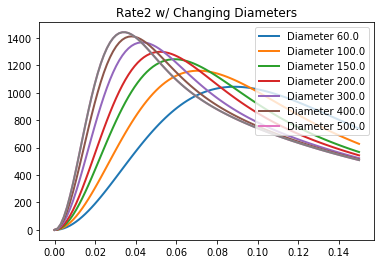

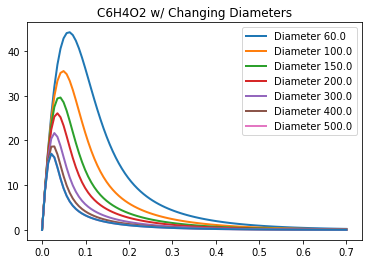

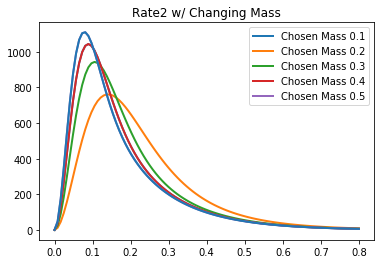

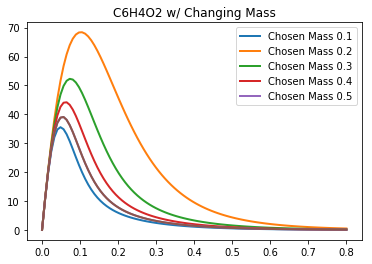

In [29]:
import tellurium as te
import numpy as np

r = te.loada('''

//first valve opens - cue chemical rxn
R0: H2O2 -> .5O2 + H2O + Heat1; rxnRate1                                         //Rate
R1: C6H6O2 + .5O2 -> H2O + C6H4O2 + Heat2; rxnRate2

//flow into nozzle
R2: C6H4O2 + H2O -> ; nozzleFlowRate                                            //Rate2

//general rate
Constants = A*e^(E/(R*T))
rxnRate1 := (H2O2*Constants)                                                     //mol/second
rxnRate2 := (C6H6O2*Constants)                                                   //mol/second

//rate out of nozzle 
nozzleFlowRate := (massLost)*(C6H4O2*H2O)*nozzleDiameter/(11.63/1000)            //mol*mm^2/s

A = 5*10^7; E = -3.8*10^4; R = 8.314; e = 2.718
T := 290 + ((Heat1 + Heat2) / ((89 + 75.3)*((H2O2/34.0147)+(C6H6O2/110.1))))     //K

chamberVolume = pi*((600/1000)/2)^2 * (300/1000)                                 //mm^3
nozzleVolume = pi*((nozzleDiameter/1000)/2)^2 * (100/1000)                       //mm^3
Pulse = 6.7/Discharge                                                            //pulse per millisecond
Discharge = 531                                                                  //per second
massLost = (chosenMass/1000)*3/(2*(18.018) + 108.095)                            //mol

C6H6O2 = 200                                                                       //mol
H2O2 = 1700                                                                        //mol
Heat1 = -1041.707                                                                //K
Heat2 = -4069.67                                                                 //K
nozzleDiameter = 60                                                              //um
chosenMass = 0.3                                                                 //grams

''')

vals = [60, 100, 150, 200, 300, 400, 500]
grams = [.1, .2, .3, .4, .5]
m = r.simulate(0, 10, 100)
Title = []
name = []
Label = []

for i in range(len(vals)):
    r.resetAll()
    r.nozzleDiameter = vals[i]
    result1 = r.simulate(0, .15, 100, ['Time', 'R2'])
    te.plotArray(result1, show = False, labels = ['Diameter ' + str(r.nozzleDiameter)], resetColorCycle = False)
    
te.plotArray(result1, show = True, title = 'Rate2 w/ Changing Diameters', resetColorCycle = False)

# for i in range(len(vals)):
#     r.resetAll()
#     r.nozzleDiameter = vals[i]
#     result1 = r.simulate(0, 15, 100, ['Time', 'H2O2'])
#     te.plotArray(result1, show = False, labels = ['Diameter ' + str(r.nozzleDiameter)], resetColorCycle = False)
    
# te.plotArray(result1, show = True, title = 'H2O2 w/ Changing Diameters')

# for i in range(len(vals)):
#     r.resetAll()
#     r.nozzleDiameter = vals[i]
#     result1 = r.simulate(0, 1.5, 100, ['Time', 'C6H6O2'])
#     te.plotArray(result1, show = False, labels = ['Diameter ' + str(r.nozzleDiameter)], resetColorCycle = False)
    
# te.plotArray(result1, show = True, title = 'C6H6O2 w/ Changing Diameters')

# for i in range(len(vals)):
#     r.resetAll()
#     r.nozzleDiameter = vals[i]
#     result1 = r.simulate(0, 10, 1000, ['Time', 'H2O'])
#     te.plotArray(result1, show = False, labels = ['Diameter ' + str(r.nozzleDiameter)], resetColorCycle = False)
    
# te.plotArray(result1, show = True, title = 'H2O w/ Changing Diameters')

for i in range(len(vals)):
    r.resetAll()
    r.nozzleDiameter = vals[i]
    result1 = r.simulate(0, .7, 100, ['Time', 'C6H4O2'])
    te.plotArray(result1, show = False, labels = ['Diameter ' + str(r.nozzleDiameter)], resetColorCycle = False)
    
te.plotArray(result1, show = True, title = 'C6H4O2 w/ Changing Diameters', resetColorCycle = True)



for i in range(len(grams)):
    r.resetAll()
    r.chosenMass = grams[i]
    result1 = r.simulate(0, .8, 100, ['Time', 'R2'])
    te.plotArray(result1, show = False, labels = ['Chosen Mass ' + str(r.chosenMass)], resetColorCycle = False)
    
te.plotArray(result1, show = True, title = 'Rate2 w/ Changing Mass', resetColorCycle = True)

# for i in range(len(grams)):
#     r.resetAll()
#     r.chosenMass = grams[i]
#     result1 = r.simulate(0, 1.5, 100, ['Time', 'C6H6O2'])
#     te.plotArray(result1, show = False, labels = ['Chosen Mass ' + str(r.chosenMass)], resetColorCycle = False)
    
# te.plotArray(result1, show = True, title = 'C6H6O2 w/ Changing Mass')


# for i in range(len(grams)):
#     r.resetAll()
#     r.chosenMass = grams[i]
#     result1 = r.simulate(0, 1.5, 100, ['Time', 'H2O2'])
#     te.plotArray(result1, show = False, labels = ['Chosen Mass ' + str(r.chosenMass)], resetColorCycle = False)
    
# te.plotArray(result1, show = True, title = 'H2O2 w/ Changing Mass')


for i in range(len(grams)):
    r.resetAll()
    r.chosenMass = grams[i]
    result1 = r.simulate(0, .8, 100, ['Time', 'C6H4O2'])
    te.plotArray(result1, show = False, labels = ['Chosen Mass ' + str(r.chosenMass)], resetColorCycle = False)
    
te.plotArray(result1, show = True, title = 'C6H4O2 w/ Changing Mass', resetColorCycle = False)


# for i in range(len(grams)):
#     r.resetAll()
#     r.chosenMass = grams[i]
#     result1 = r.simulate(0, 10, 1000, ['Time', 'H2O'])
#     te.plotArray(result1, show = False, labels = ['Chosen Mass ' + str(r.chosenMass)], resetColorCycle = False)
    
# te.plotArray(result1, show = True, title = 'H2O w/ Changing Mass')




    #result1 = r.simulate(0, 100, 100, ['Time', 'H2O2'])
    #Title ='Diameter ' + str(r.nozzleDiameter)
    #r.plot(title = Title)

#     for j in range(len(time)):
#         if((water[j-1] <= hydroper[j-1]) and (water[j] >= hydroper[j])):
#             print(time[j])
        
        
# for i in range(len(vals)):
#     r.resetAll()
#     r.nozzleDiameter = vals[i]
#     result = r.simulate(0, 0.4, 100, ['Time', 'nozzleFlowRate'])
#     Title ='Flow Rate ' + str(r.nozzleDiameter)
#     r.plot(title = Title)
    
    
    #m = np.hstack([m,n])
    #Label.append(['Diameter ' + str(r.nozzleDiameter)])
    #te.plotArray(m, show = False, Label = ['Diameter ' + str(r.nozzleDiameter)], resetColorCycle = False)

#te.plotArray(m, show = True)
    
#r.simulate(0, 10, 100, ['Time', 'C6H6O2', 'H2O2'])
#r.simulate(0, 10, 100, ['Time', 'C6H4O2', 'H2O'])
#r.simulate(0, 10, 100, ['Time', 'N'])
#r.simulate(0, (24/1000), 100, ['Time', 'C6H6O2', 'C6H4O2', 'H2O'])
#r.simulate(0, 10, 100)
#r.plot()